# Fase (1): Importação do conjunto de dados e transformação em matriz binária

In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('groceries.csv', sep=';', header=None)

df

In [5]:
df.shape

(9835, 1)

### Primeiro, precisamos transformar o dataframe em listas com as strings que representam cada item adquirido, em cada registro

In [6]:
lista_compras = list()

for i in df.values.tolist():
    lista_compras.append(i[0].split(','))

In [7]:
lista_compras[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

### Agora podemos aplicar o método TransactionEncoder() para transformar em matriz binária

In [8]:
from mlxtend.preprocessing import TransactionEncoder

In [9]:
te = TransactionEncoder()

In [10]:
lista_encoded = te.fit_transform(lista_compras, sparse=False)

In [11]:
te.columns_[:10]

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef']

In [12]:
df_compras = pd.DataFrame(data=lista_encoded, columns=te.columns_)

In [13]:
df_compras.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
df_compras.shape

(9835, 169)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

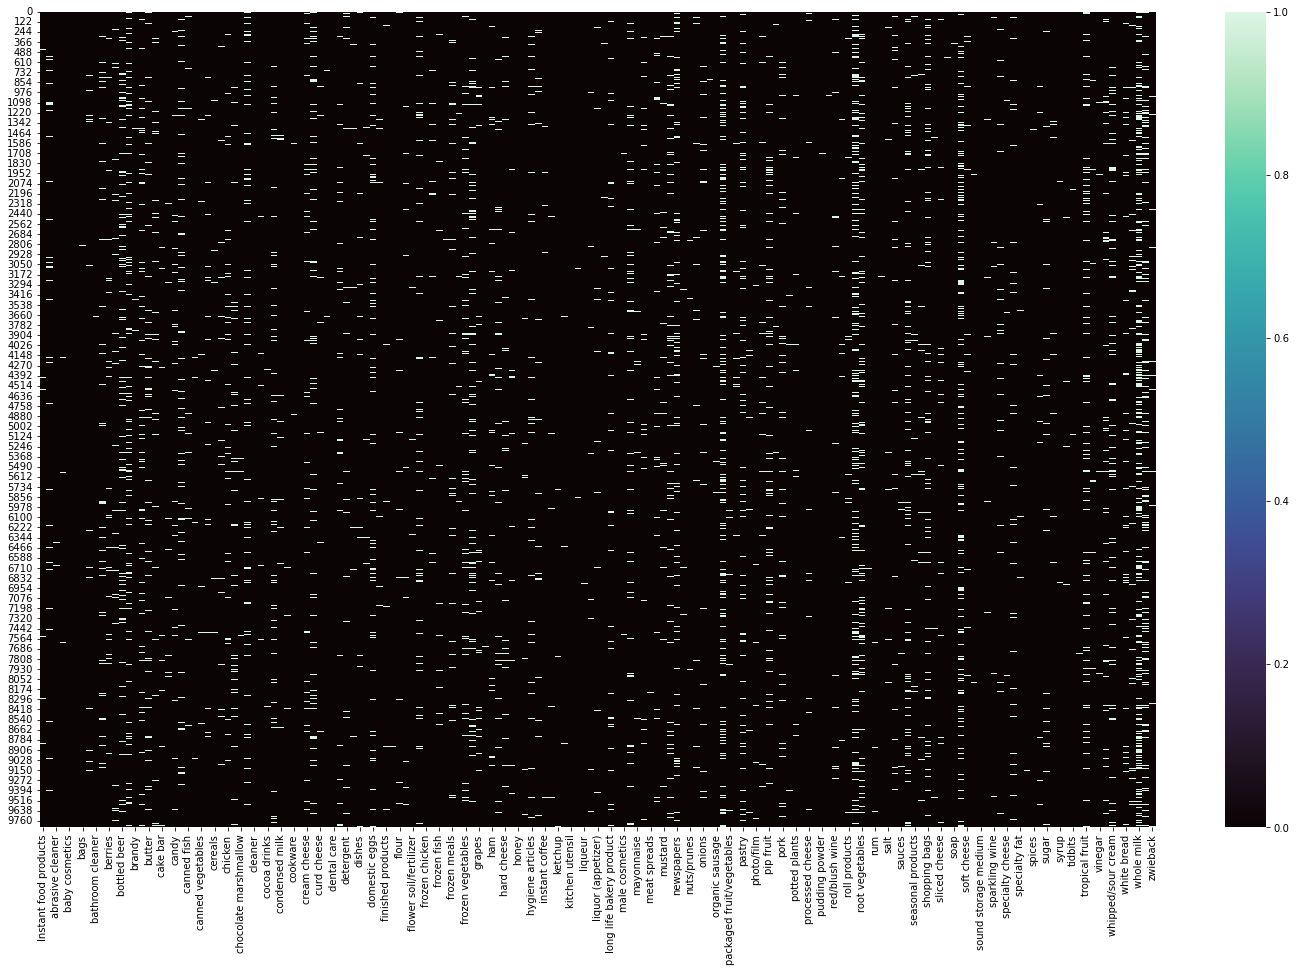

In [16]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_compras, cmap='mako')

# Fase (2): Geração de itens frequentes com Apriori e FP-Growth (min_support=0.02)

In [17]:
from mlxtend.frequent_patterns import apriori, fpgrowth

In [50]:
# Apriori
ap_itemsets = apriori(df_compras, min_support=0.02, use_colnames=True)

In [51]:
ap_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whipped/sour cream, whole milk)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(whole milk, yogurt)"
120,0.023183,"(root vegetables, other vegetables, whole milk)"


In [52]:
ap_itemsets.sort_values(by='support', ascending=False).tail(10)

,support,itemsets
94,0.021047,"(pastry, soda)"
105,0.021047,"(root vegetables, tropical fruit)"
93,0.020946,"(pastry, rolls/buns)"
112,0.020844,"(tropical fruit, soda)"
118,0.020742,"(whipped/sour cream, yogurt)"
75,0.020539,"(whole milk, frankfurter)"
60,0.020437,"(whole milk, bottled beer)"
76,0.020437,"(whole milk, frozen vegetables)"
96,0.020437,"(pip fruit, tropical fruit)"
67,0.020031,"(other vegetables, butter)"


In [53]:
# FP-Growth
fp_itemsets = fpgrowth(df_compras, min_support=0.02, use_colnames=True)

In [54]:
fp_itemsets

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
117,0.022166,"(whole milk, pork)"
118,0.021657,"(other vegetables, pork)"
119,0.029995,"(whole milk, domestic eggs)"
120,0.022267,"(other vegetables, domestic eggs)"


In [55]:
fp_itemsets.sort_values(by='support', ascending=False).tail(10)

,support,itemsets
51,0.021047,(chewing gum)
72,0.021047,"(root vegetables, tropical fruit)"
99,0.020946,"(pastry, rolls/buns)"
73,0.020844,"(tropical fruit, soda)"
116,0.020742,"(whipped/sour cream, yogurt)"
93,0.020539,"(whole milk, frankfurter)"
82,0.020437,"(whole milk, bottled beer)"
75,0.020437,"(pip fruit, tropical fruit)"
121,0.020437,"(whole milk, frozen vegetables)"
79,0.020031,"(other vegetables, butter)"


# Fase (3): Criação das regras de associação (utilizando apenas o ap_itemsets)

In [56]:
from mlxtend.frequent_patterns import association_rules

In [59]:
regras = association_rules(ap_itemsets, metric="confidence", min_threshold=0.3)

In [60]:
regras.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
4,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
7,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
32,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
33,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
9,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
30,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
27,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
17,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
11,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,0.008149,1.294636
